In [9]:
# lets read the image
import matplotlib.pyplot as plt
import tifffile
import numpy as np
psf_path = '/share/klab/argha/Data_from_university/rDL-SIM/OTF_UOS/488nm/PSFs_OTFs_256x256/PSF_488_01.tif'
otf_path = '/share/klab/argha/Data_from_university/rDL-SIM/OTF_UOS/488nm/PSFs_OTFs_256x256/OTF_488_01.tif'

In [2]:
psf = tifffile.imread(psf_path)
otf = tifffile.imread(otf_path)

print(f'psf original information: \nShape: {psf.shape}\n Max: {psf.max()}\n Min: {psf.min()} \ntype: {psf.dtype}')
print()
print(f'otf original infomation: \nShape: {otf.shape}\n Max: {otf.max()}\n Min: {otf.min()} \ntype: {otf.dtype}')

psf original information: 
Shape: (256, 256)
 Max: 5216
 Min: 324 
type: uint16

otf original infomation: 
Shape: (129, 2)
 Max: 1.0
 Min: -0.0036902681458741426 
type: float32


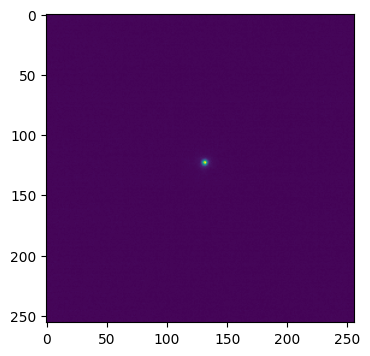

In [7]:
plt.figure(figsize=(4, 4))
plt.imshow(psf)
plt.show()

otf: 
Shape: (129, 2)
 Max: 1.0
 Min: -0.0036902681458741426 
type: float32


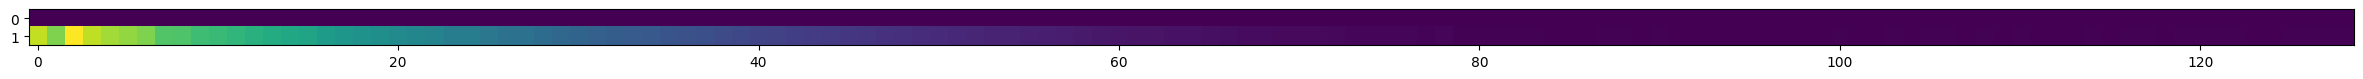

In [10]:
print(f'otf: \nShape: {otf.shape}\n Max: {otf.max()}\n Min: {otf.min()} \ntype: {otf.dtype}')
plt.figure(figsize=(30, 20))
plt.imshow(np.rot90(otf))
plt.show()

new_arr : 
Shape: (257, 2)
otf: 
Shape: (129, 2)
 Max: 1.0
 Min: -0.0036902681458741426 
type: float32


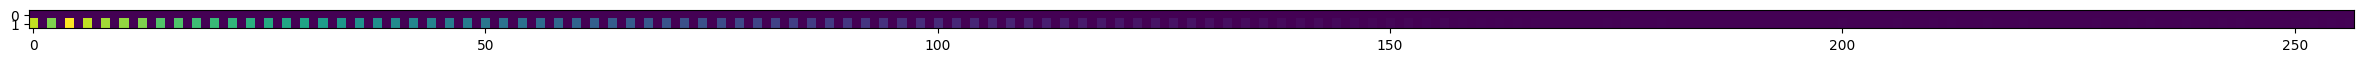

In [14]:
import numpy as np

# Example array of shape (129, 2)
arr = otf  # replace this with your actual array

# Create a new array of zeros with the desired shape (257, 2)
new_arr = np.zeros((257, 2))

# Fill in the first row with alternating values and zeros
new_arr[0::2, :] = otf

# The second row remains zeros by default

print(f'new_arr : \nShape: {new_arr.shape}')

print(f'otf: \nShape: {otf.shape}\n Max: {otf.max()}\n Min: {otf.min()} \ntype: {otf.dtype}')
plt.figure(figsize=(30, 20))
plt.imshow(np.rot90(new_arr))
plt.show()

otf_flatten: 
Shape: (258,)
 Max: 1.0
 Min: -0.0036902681458741426 
type: float32


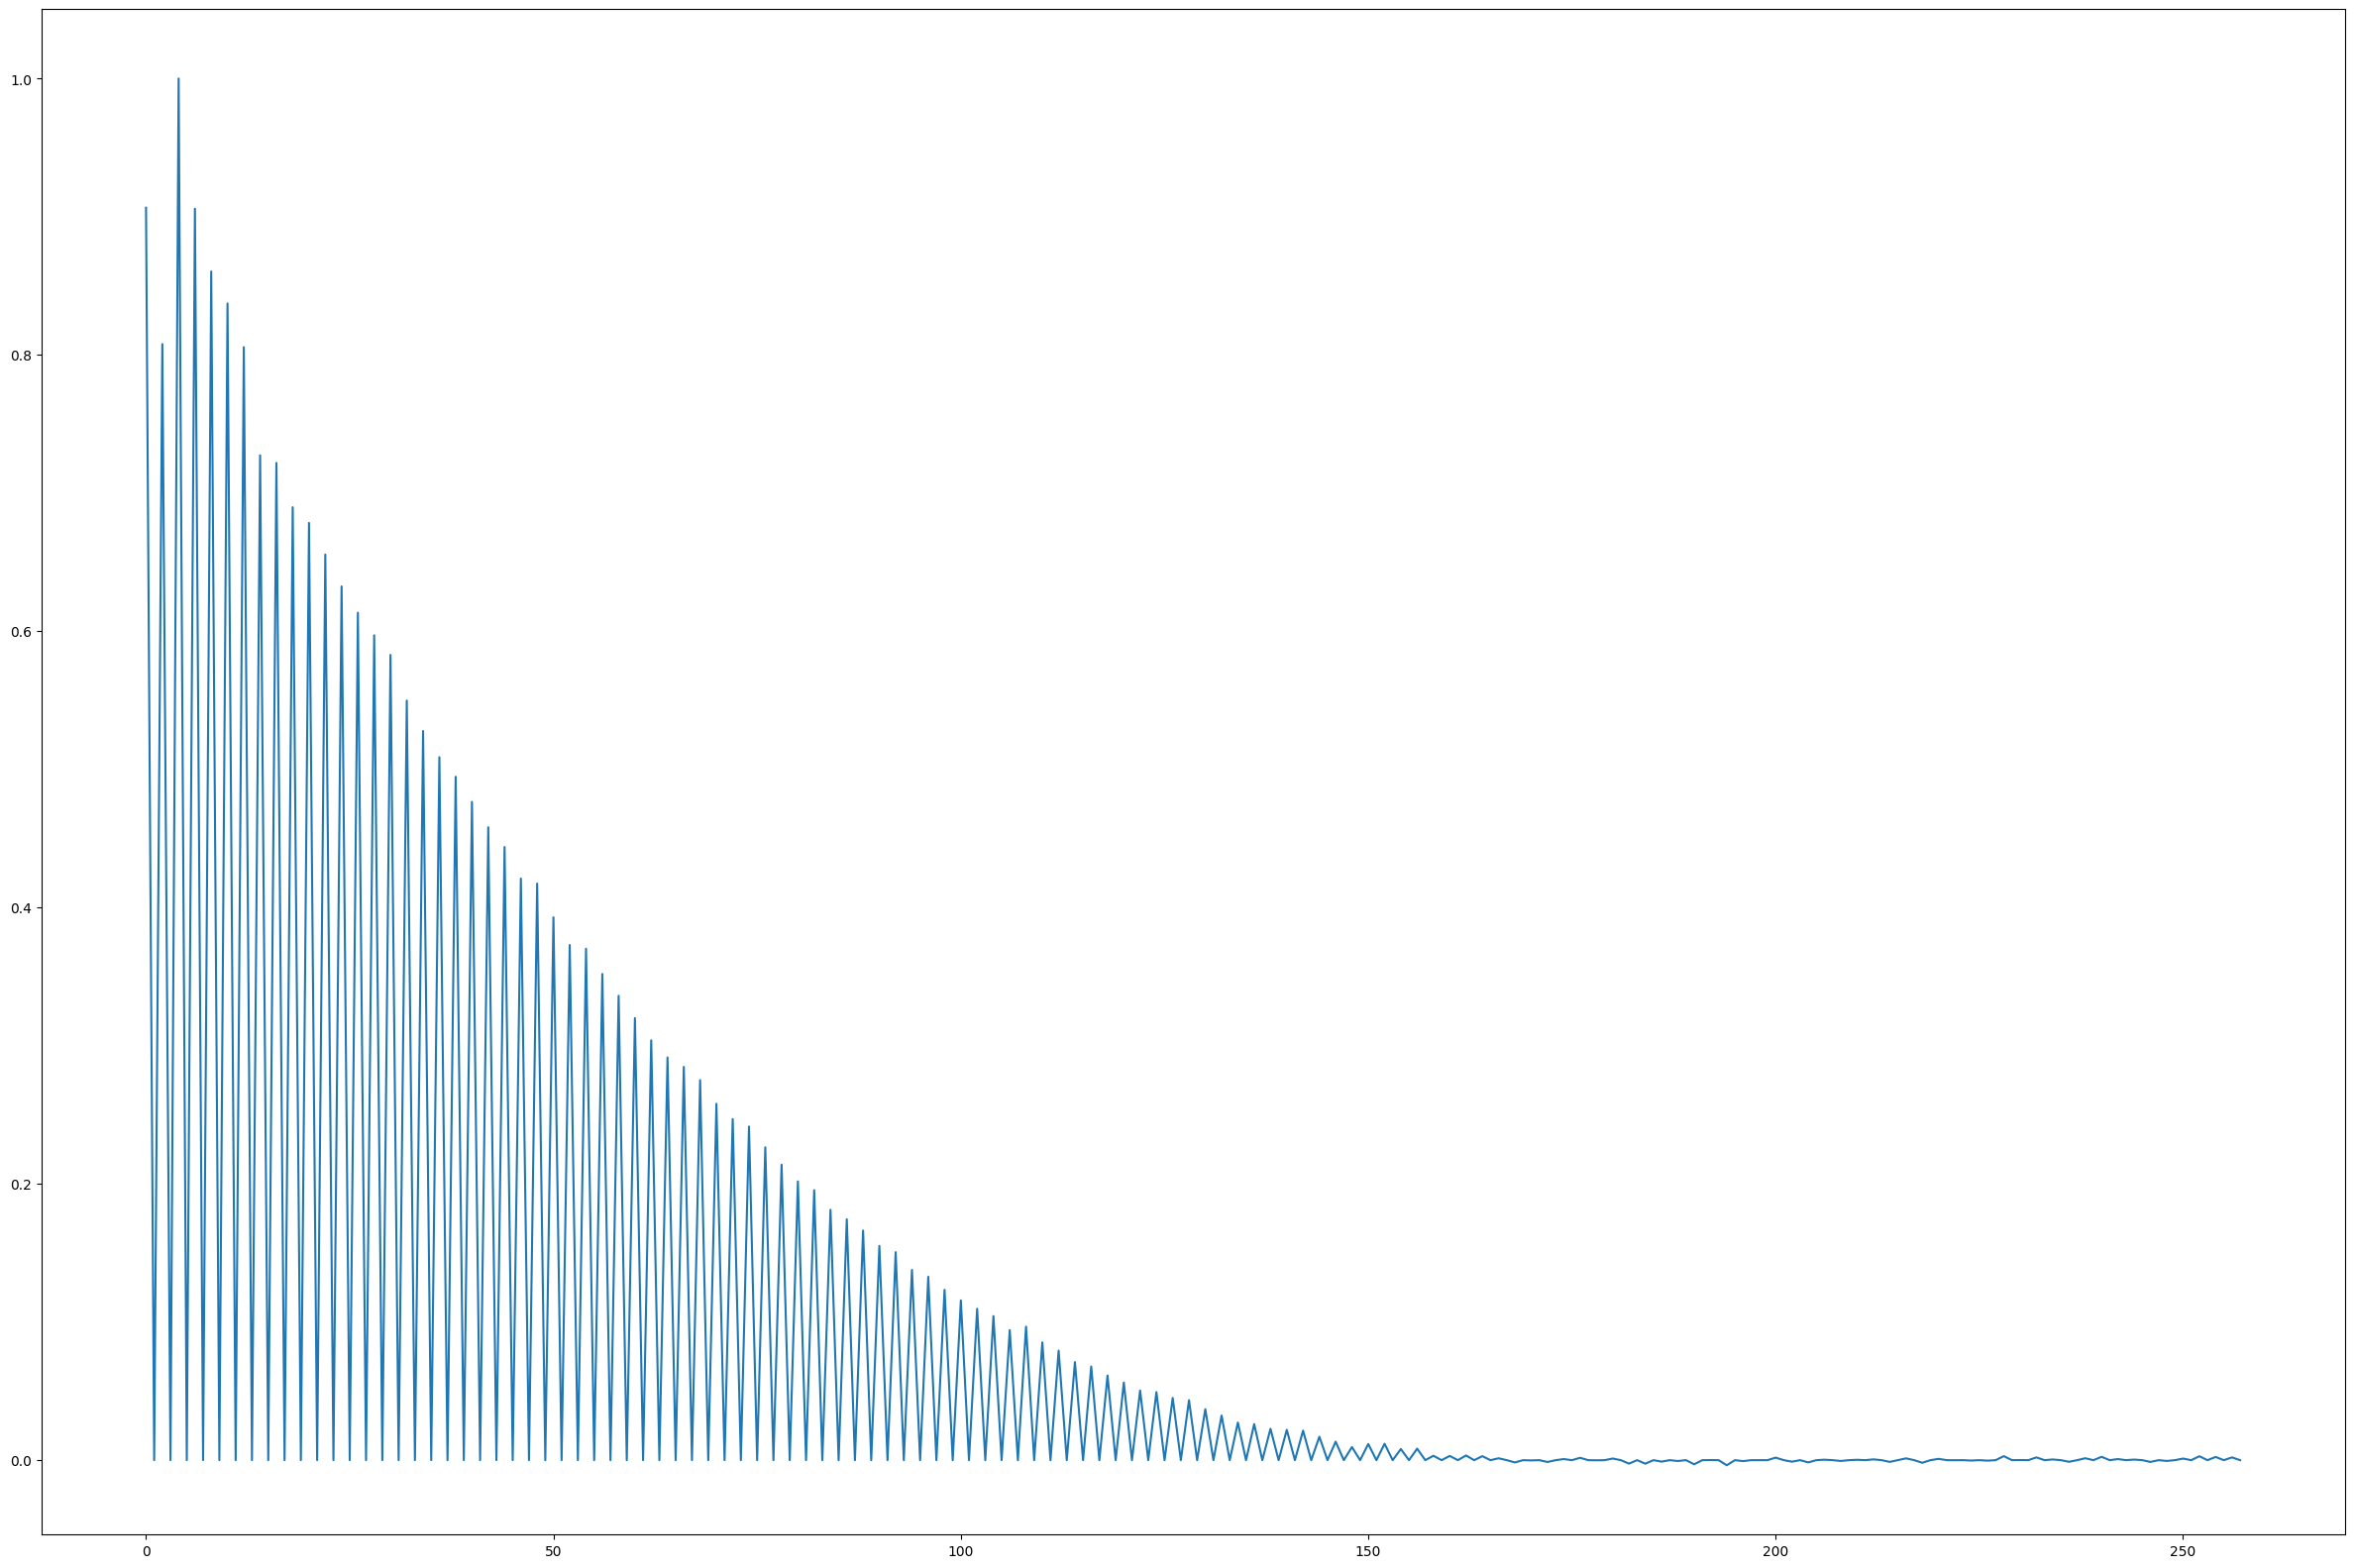

otf_flatten: 
Shape: (514,)
 Max: 1.0
 Min: -0.0036902681458741426 
type: float64


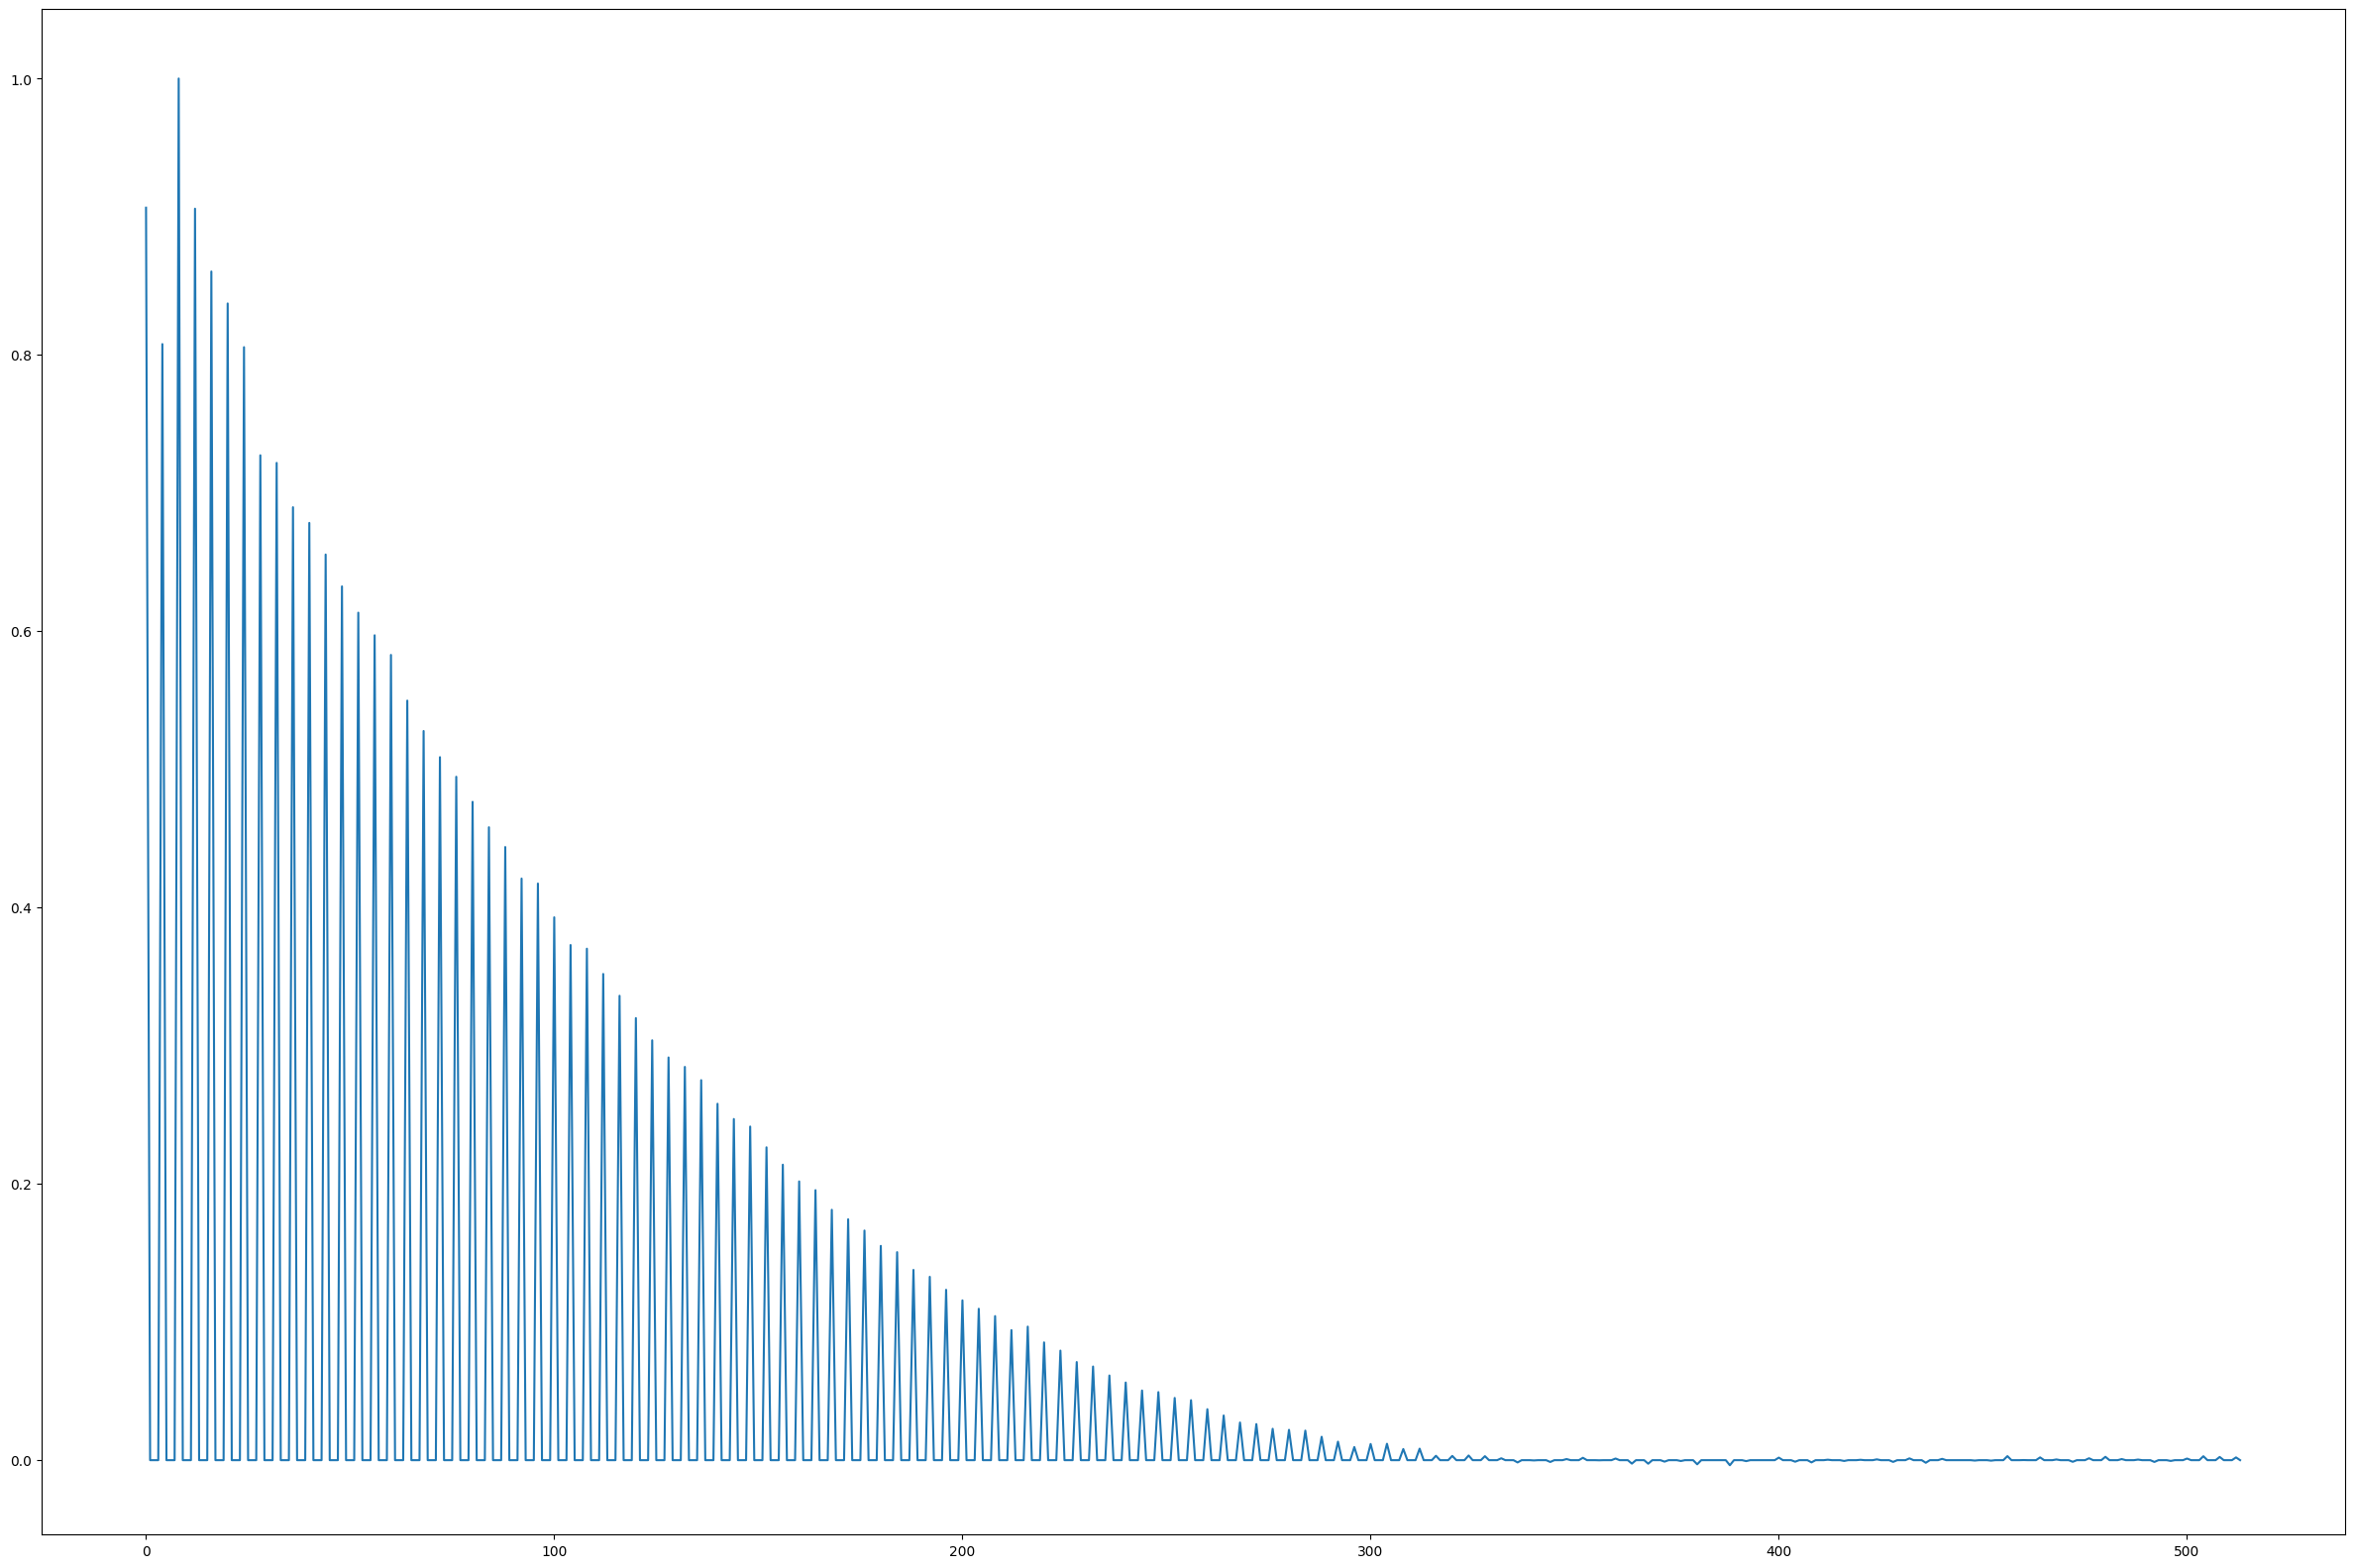

In [15]:
otf_flatten = otf.flatten()
print(f'otf_flatten: \nShape: {otf_flatten.shape}\n Max: {otf_flatten.max()}\n Min: {otf_flatten.min()} \ntype: {otf_flatten.dtype}')
plt.figure(figsize=(30, 20))
plt.plot(otf_flatten)
plt.show()

#no we make it as 1 array. 
otf_flatten_new = new_arr.flatten()
print(f'otf_flatten: \nShape: {otf_flatten_new.shape}\n Max: {otf_flatten_new.max()}\n Min: {otf_flatten_new.min()} \ntype: {otf_flatten_new.dtype}')
plt.figure(figsize=(30, 20))
plt.plot(otf_flatten_new)
plt.show()

In [16]:
Nx = 128
Ny = 128
scale = 2
[Nx_hr, Ny_hr] = [Nx* scale, Ny* scale] 
dx = 62.6e-3
dy = dx
dxy = dx 
dkx = 1.0 / ( Nx *  dxy)
dky = 1.0 / ( Ny * dxy)
dkr = np.min([dkx, dky])

print(f'Nx: {Nx}, \n  Ny: {Ny}, \n scale: {scale}, \n Nx_hr: {Nx_hr}, \n Ny_hr: {Ny_hr}, \n dx: {dx}, \n dy: {dy}, \n dxy: {dxy}, \n dkx: {dkx}, \n dky: {dky}, \n dkr: {dkr}')


Nx: 128, 
  Ny: 128, 
 scale: 2, 
 Nx_hr: 256, 
 Ny_hr: 256, 
 dx: 0.0626, 
 dy: 0.0626, 
 dxy: 0.0626, 
 dkx: 0.12480031948881788, 
 dky: 0.12480031948881788, 
 dkr: 0.12480031948881788


In [21]:
# otf_flatten_new : shape (514,)
import numpy as np
import numpy.fft as F
from scipy.interpolate import interp1d
import tifffile
import matplotlib.pyplot as plt


def read_otf_extract_PSF(otf_path, Nx_hr, Ny_hr, dkx, dky, dkr):
    rawOTF = otf_path

    print('\n\n Reading OTF has been Done \n\n')
    print(rawOTF.shape)
    #
    nxotf =257
    
    nyotf = 1
   
    dkrotf = 0.03120007924735546
    
    diagdist = int(np.sqrt(np.square(Nx_hr / 2) + np.square(Ny_hr / 2)) + 2)
    print(f'diagdist: {diagdist}')
    rawOTF = np.squeeze(rawOTF)
    print(f'rawOTF shape: {rawOTF.shape}')
    OTF = rawOTF[0:-1:2]
    print(f'OTF shape: {OTF.shape}')
    x = np.arange(0, nxotf * dkrotf, dkrotf)
    print(f'x shape: {x.shape}')

    xi = np.arange(0, (nxotf - 1) * dkrotf, dkr)
    print(f'xi shape: {xi.shape}')
    interp = interp1d(x, OTF, kind='slinear')
    print(f'intrep shape: {interp}')
    OTF = interp(xi)
    print(f'OTF shape: {OTF.shape}')
    sizeOTF = len(OTF)
    print(f'sizeOTF: {sizeOTF}')
    prol_OTF = np.zeros((diagdist * 2))
    print(f'prol_OTF shape: {prol_OTF.shape}')
    prol_OTF[0:sizeOTF] = OTF

    # so we cut the OTF here as prol_OTF and share it as new OTF
    OTF = prol_OTF
    print(f'OTF shape    OTF = prol_OTF : {OTF.shape}')
    kxx = dkx * np.arange(-Nx_hr / 2, Nx_hr / 2, 1)
    print(f'kxx shape: {kxx.shape}')
    kyy = dky * np.arange(-Ny_hr / 2, Ny_hr / 2, 1)
    print(f'kyy shape: {kyy.shape}')
    [dX, dY] = np.meshgrid(kxx, kyy)

    rdist = np.sqrt(np.square(dX) + np.square(dY))
    print(f'rdist shape: {rdist.shape}')
    otflen = len(OTF)
    print(f'otflen: {otflen}')
    x = np.arange(0, otflen * dkr, dkr)
    print(f'x shape: {x.shape}')
    interp = interp1d(x, OTF, kind='slinear')
    print(f'interp shape: {interp}')
    OTF = interp(rdist)
    print(f'OTF shape: {OTF.shape}')

    print('OTF has been read. now geeting PSF')

    PSF = abs(F.fftshift(F.fft2(OTF)))
    PSF = PSF / np.sum(PSF)

    print(f'PSF shape: {PSF.shape} : psf min : {np.min(PSF)} : psf max : {np.max(PSF)} : dtype : {PSF.dtype}')
    print(PSF)
    print(f'OTF shape: {OTF.shape} : OTF min : {np.min(OTF)} : OTF max : {np.max(OTF)} : dtype : {OTF.dtype}')
    print(OTF)
    print(f'prol_OTF shape: {prol_OTF.shape} : prol_OTF min : {np.min(prol_OTF)} : prol_OTF max : {np.max(prol_OTF)} : dtype : {prol_OTF.dtype}')
    print(prol_OTF)
    return OTF, prol_OTF, PSF
OTF_uni_os, prol_OTF_uni_os, PSF_uni_os = read_otf_extract_PSF(otf_flatten_new, Nx_hr, Ny_hr, dkx, dky, dkr)






 Reading OTF has been Done 


(514,)
diagdist: 183
rawOTF shape: (514,)
OTF shape: (257,)
x shape: (257,)
xi shape: (64,)
intrep shape: <scipy.interpolate._interpolate.interp1d object at 0x7fd1ba541940>
OTF shape: (64,)
sizeOTF: 64
prol_OTF shape: (366,)
OTF shape    OTF = prol_OTF : (366,)
kxx shape: (256,)
kyy shape: (256,)
rdist shape: (256, 256)
otflen: 366
x shape: (366,)
interp shape: <scipy.interpolate._interpolate.interp1d object at 0x7fd1bbd77510>
OTF shape: (256, 256)
OTF has been read. now geeting PSF
PSF shape: (256, 256) : psf min : 9.891205871446045e-10 : psf max : 0.009701671647651032 : dtype : float64
[[1.93271488e-06 2.01928206e-06 2.29579045e-06 ... 2.64331345e-06
  2.29579045e-06 2.01928206e-06]
 [2.01928206e-06 2.08287469e-06 2.27975299e-06 ... 2.50643550e-06
  2.27975299e-06 2.08287469e-06]
 [2.29579045e-06 2.27975299e-06 2.24295440e-06 ... 2.17465579e-06
  2.24295440e-06 2.27975299e-06]
 ...
 [2.64331345e-06 2.50643550e-06 2.17465579e-06 ... 1.84087512e-06
  2.1

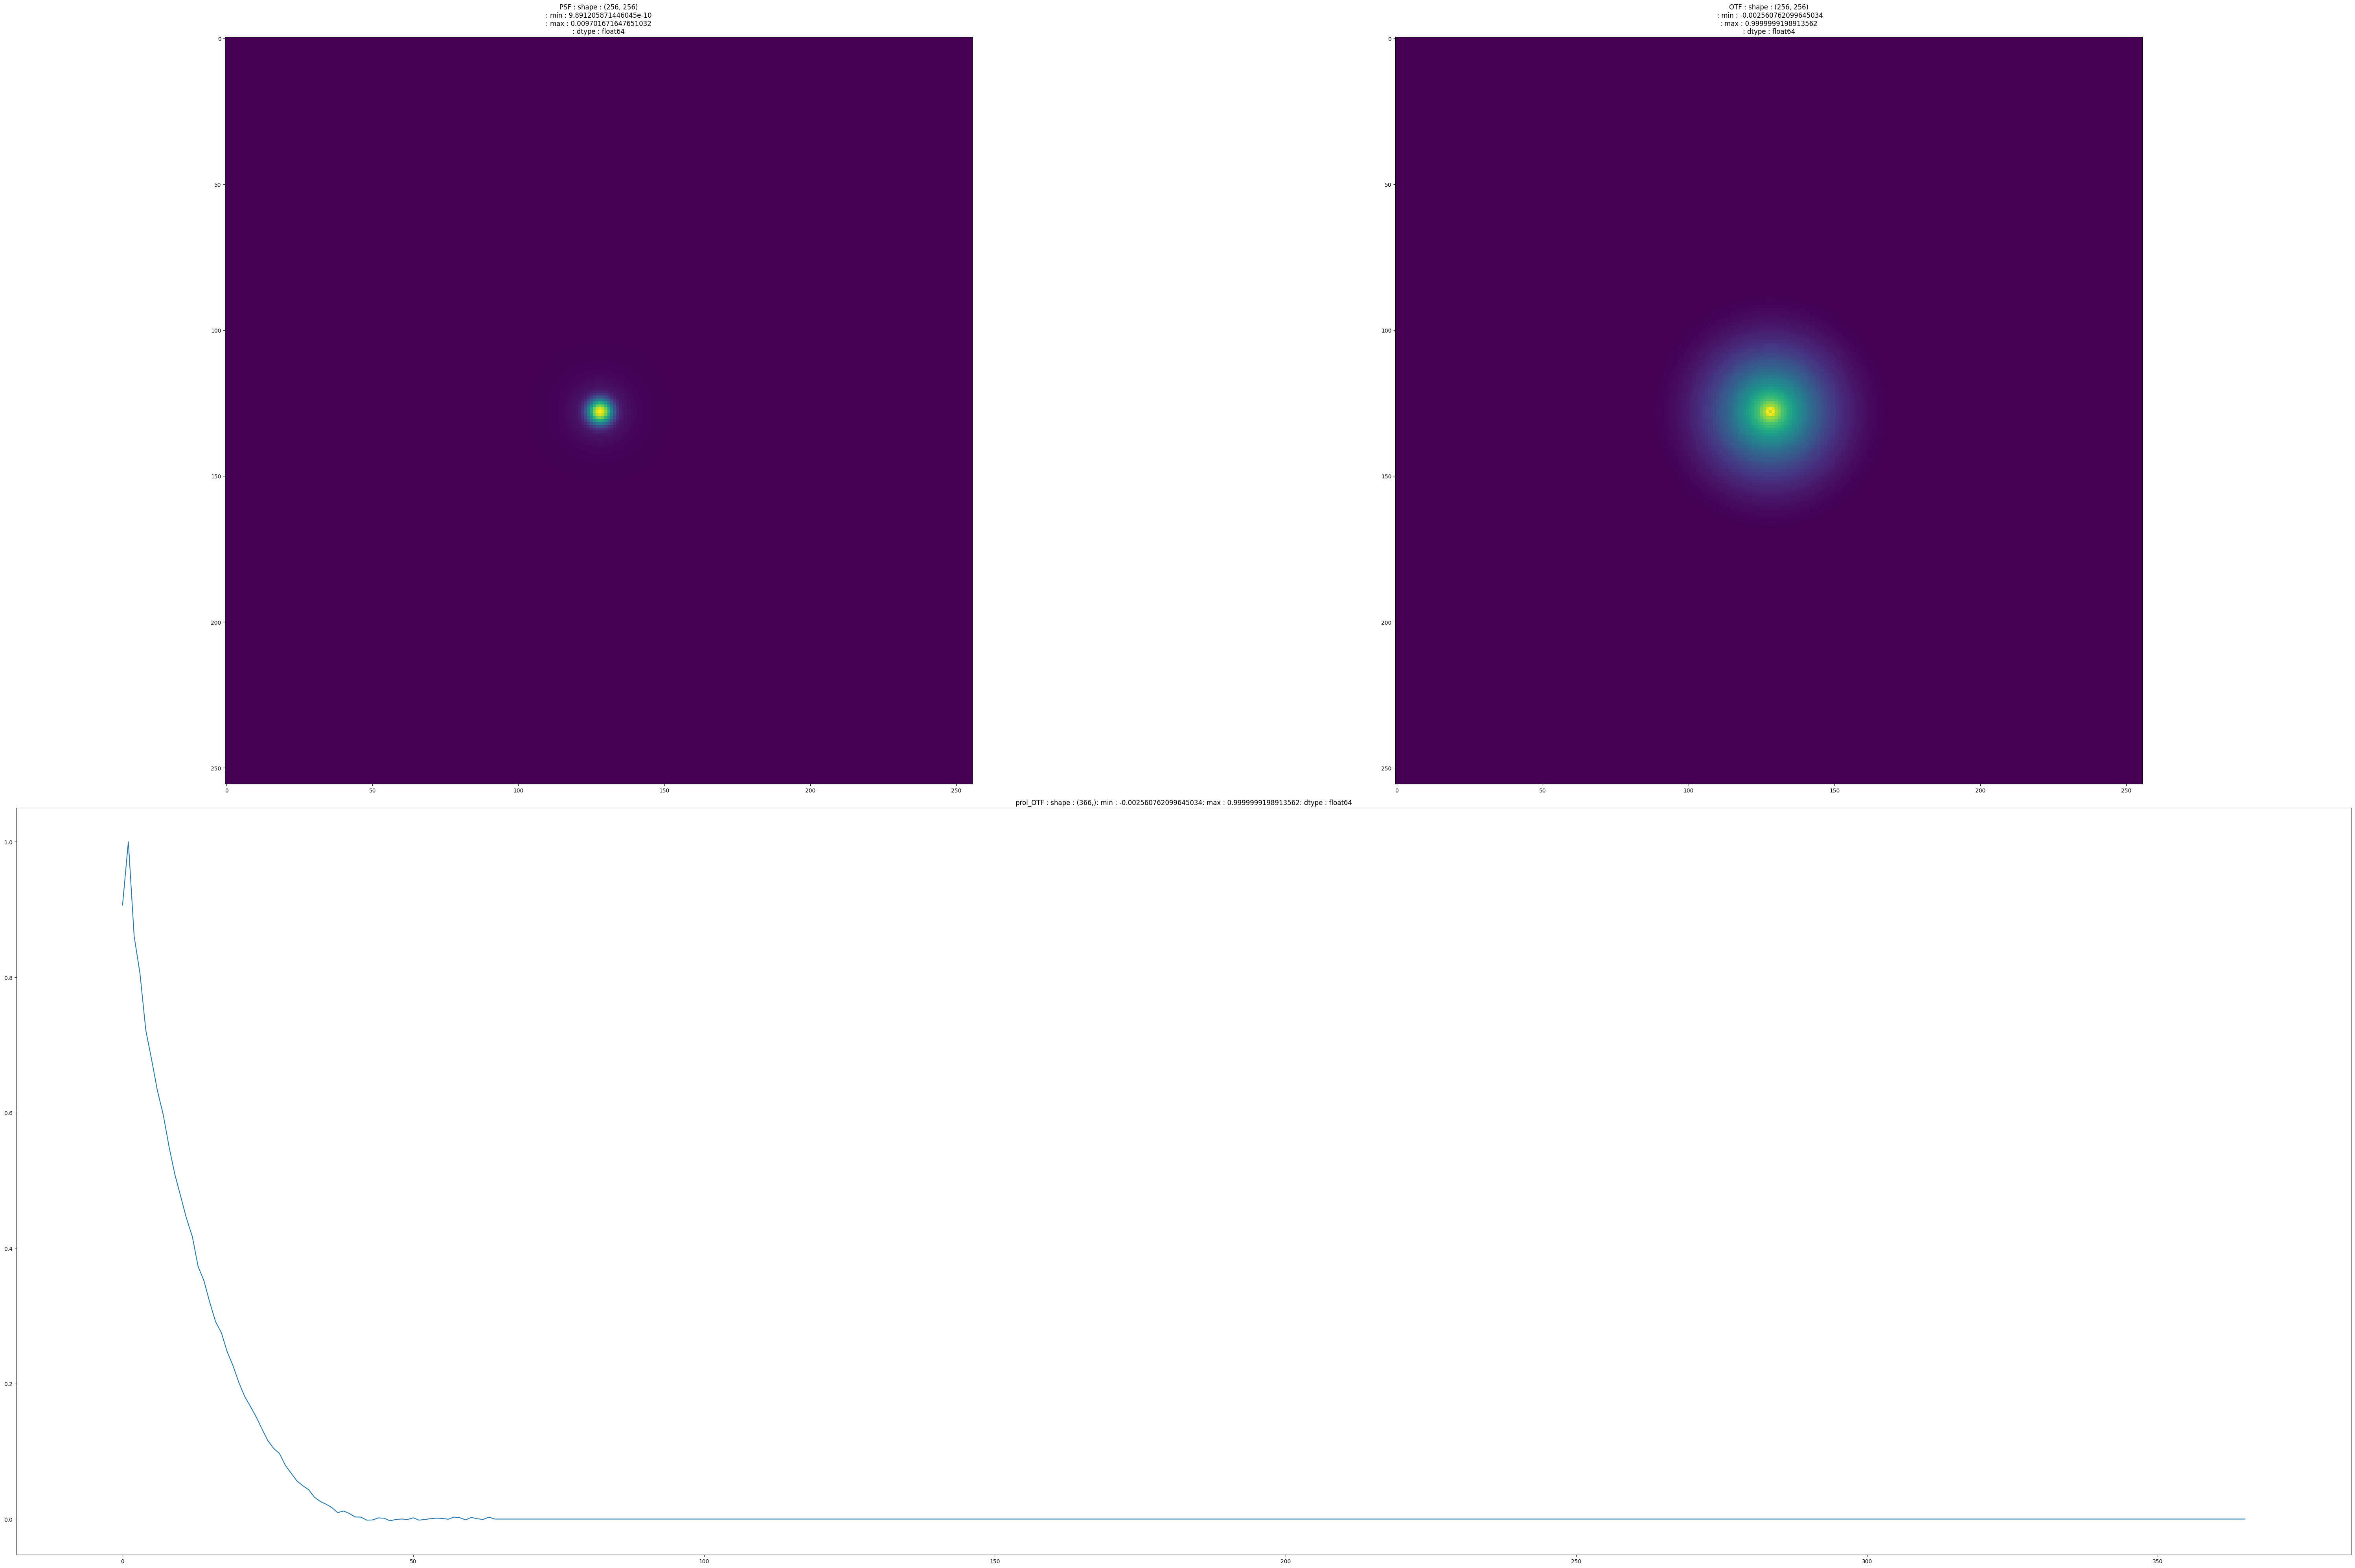

In [24]:
# Function for creating PSF, OTF, and prol_OTF plots
def psf_otf(PSF, OTF, prol_OTF):
    plt.figure(figsize=(60, 40))
    # Create the figure and subplots
    ax1 = plt.subplot(212)  # Third plot at the bottom (spans across two columns)
    # ax1.margins(0.05)  # Default margin is 0.05
    ax1.plot(prol_OTF)
    ax1.set_title(f'prol_OTF : shape : {prol_OTF.shape}: min : {np.min(prol_OTF)}: max : {np.max(prol_OTF)}: dtype : {prol_OTF.dtype}')

    ax2 = plt.subplot(221)  # First image (PSF) in the top-left corner
    # ax2.margins(2, 2)  # Zoomed out margins for the PSF plot
    ax2.imshow(PSF)
    ax2.set_title(f'PSF : shape : {PSF.shape}\n: min : {np.min(PSF)}\n: max : {np.max(PSF)}\n: dtype : {PSF.dtype}')

    ax3 = plt.subplot(222)  # Second image (OTF) in the top-right corner
    # ax3.margins(x=0, y=-0.25)  # Zoom in margins for the OTF plot
    ax3.imshow(abs(OTF))
    ax3.set_title(f'OTF : shape : {OTF.shape}\n : min : {np.min(OTF)}\n: max : {np.max(OTF)}\n: dtype : {OTF.dtype}')

    # Adjust the layout and show the figure
    plt.tight_layout()
    plt.show()


psf_otf(PSF_uni_os, OTF_uni_os, prol_OTF_uni_os)

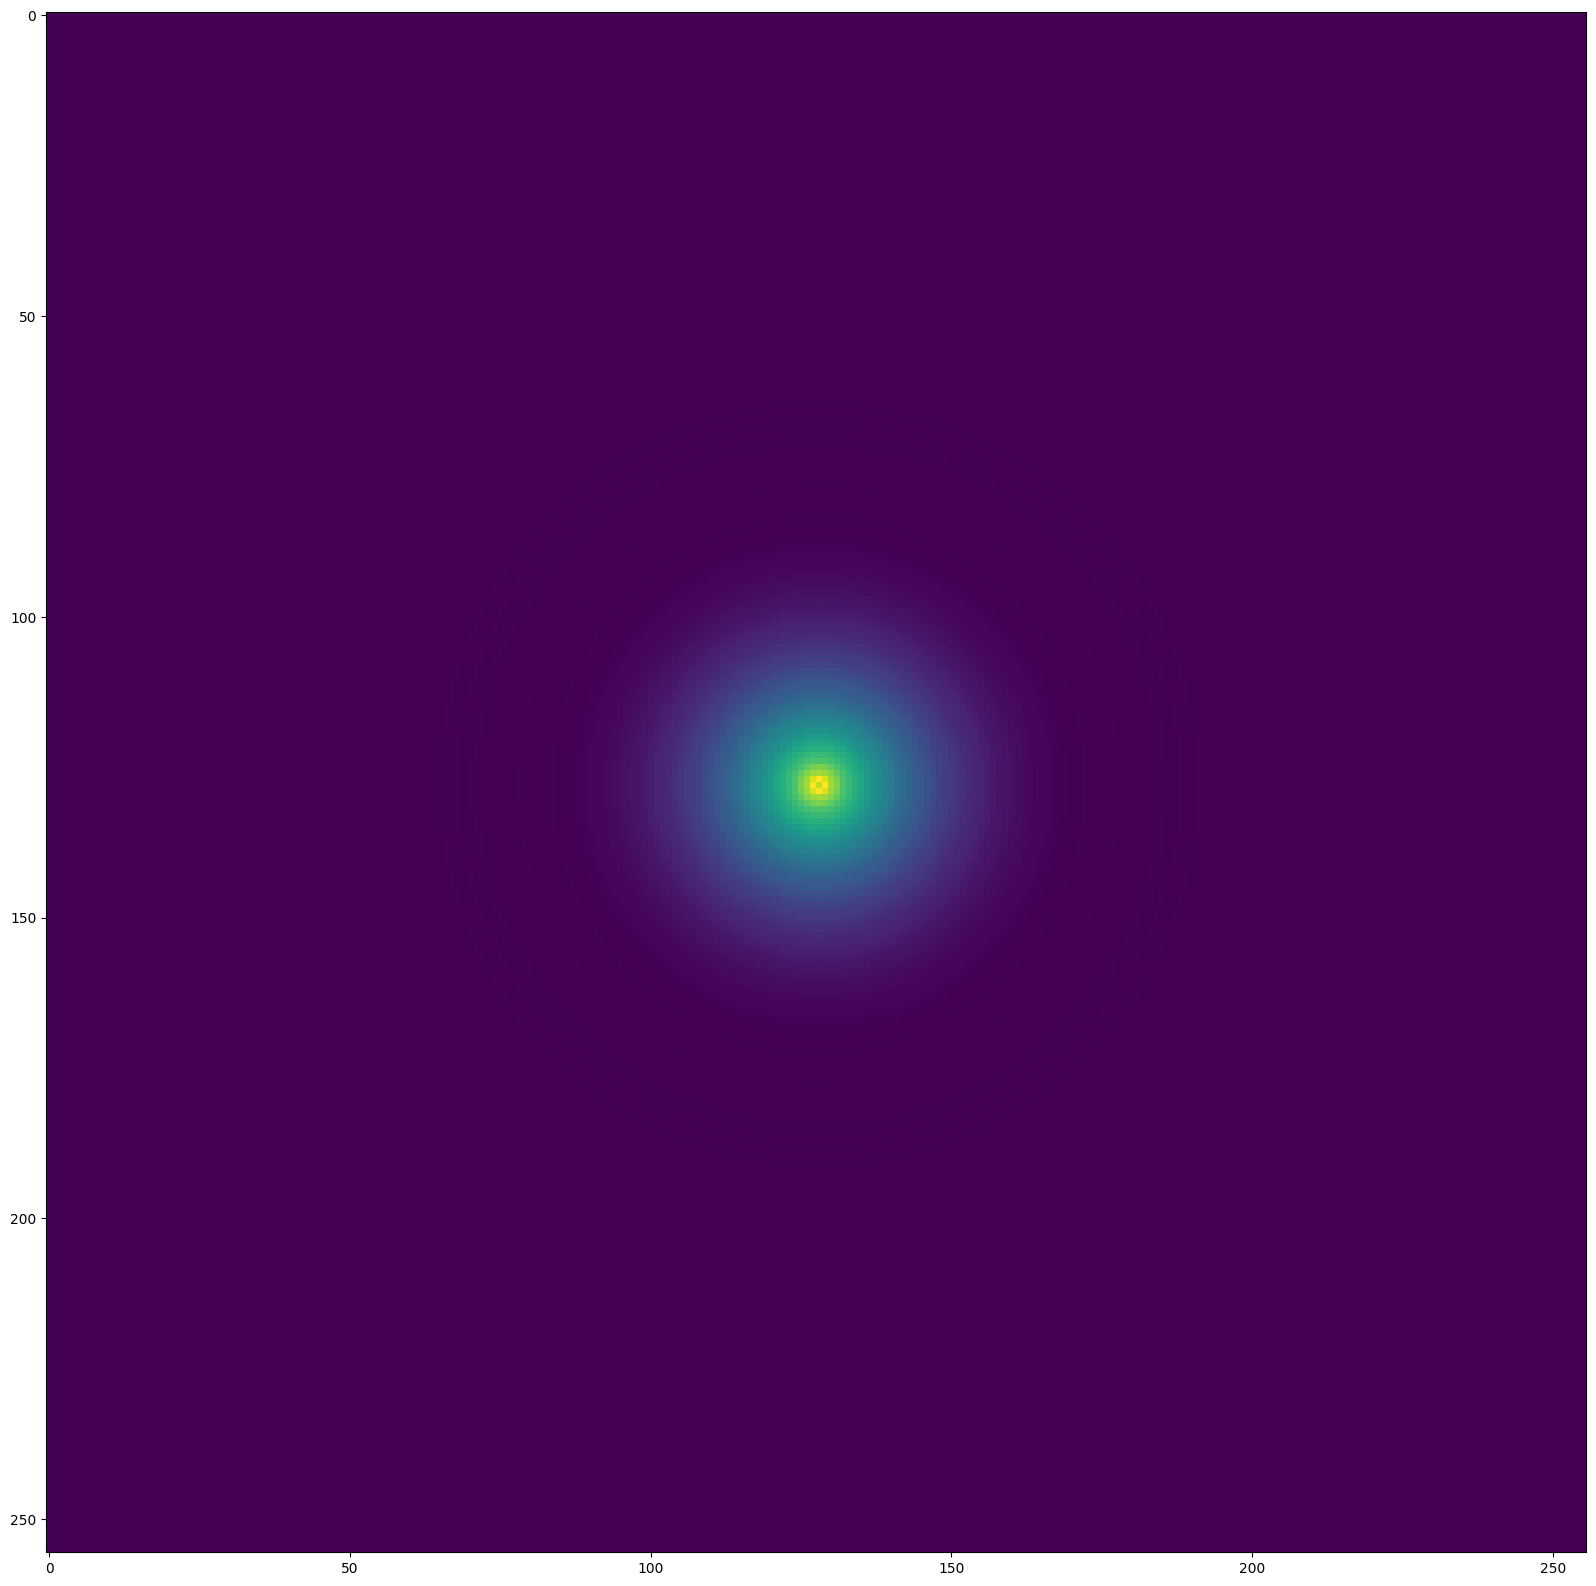

In [25]:
plt.figure(figsize=(30, 20))
plt.imshow(OTF_uni_os)
plt.show()

otf original: 
Shape: (129, 2)
 Max: 1.0
 Min: -0.0036902681458741426 
type: float32

new otf: 
Shape: (2, 129)
 Max: 1.0
 Min: -0.0036902681458741426 
type: float32


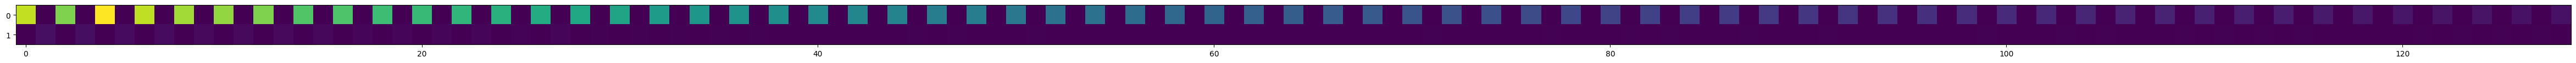

new_flattne: 
Shape: (258,)
 Max: 1.0
 Min: -0.0036902681458741426 
type: float32


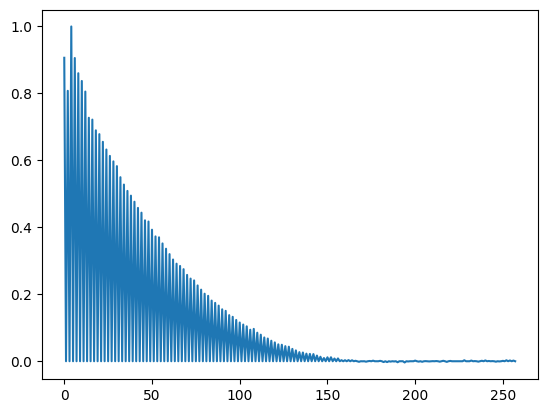

In [51]:
print(f'otf original: \nShape: {otf.shape}\n Max: {otf.max()}\n Min: {otf.min()} \ntype: {otf.dtype}')
# now I want to make it as new otf will be 258,1
# how?  new otf  if otf[0] , and then otf[1]. stacked. 
# lets try to do that
import numpy as np
original_shape = otf.reshape(2,129)
new_otf = np.stack((original_shape[0], original_shape[1]), axis=0)


print()
print(f'new otf: \nShape: {new_otf.shape}\n Max: {new_otf.max()}\n Min: {new_otf.min()} \ntype: {new_otf.dtype}')
plt.figure(figsize=(30, 20))
plt.imshow(new_otf)
plt.show()


new_flattne = new_otf.flatten()
print(f'new_flattne: \nShape: {new_flattne.shape}\n Max: {new_flattne.max()}\n Min: {new_flattne.min()} \ntype: {new_flattne.dtype}')
plt.plot(new_flattne)
plt.show()




import numpy as np
# now we extract and stack with black array
x  = otf_flatten.shape[0]
print(x)
  # Example array of shape (128,)

# Create an array of zeros with the same shape[0] (128,)
bar = np.zeros(x)

# Stack them together along a new axis to create a shape of (128, 2)
new_Otf = np.column_stack((otf_flatten, bar))

print(f'new otf  : \nShape: {new_Otf.shape}\n Max: {new_Otf.max()}\n Min: {new_Otf.min()} \ntype: {new_Otf.dtype}')
plt.plot(new_Otf.flatten())
plt.show()


plt.figure(figsize=(30, 20))
plt.imshow(new_Otf.reshape(2,258))
plt.show()

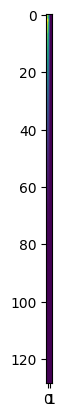

otf flatten : 
Shape: (258,)
 Max: 1.0
 Min: -0.0036902681458741426 
type: float32


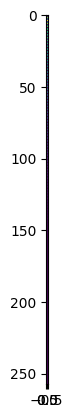

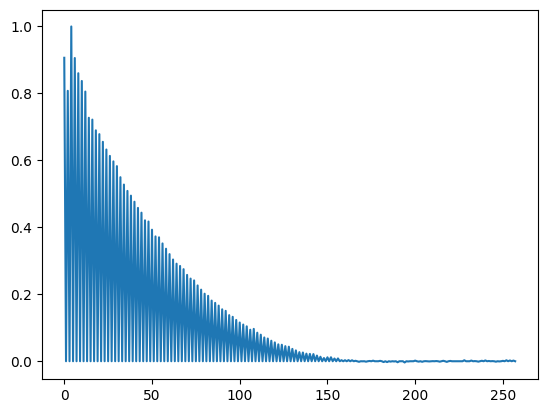

In [20]:
# flatten the otf
otf_flatten = otf.flatten()
plt.imshow(otf)
plt.show()

print(f'otf flatten : \nShape: {otf_flatten.shape}\n Max: {otf_flatten.max()}\n Min: {otf_flatten.min()} \ntype: {otf_flatten.dtype}')
plt.imshow(otf_flatten.reshape(258,1,1, order='F'))
plt.show()
itr= otf_flatten.reshape(258,1,1, order='F')
plt.plot(itr.reshape(258, order='F'))
plt.show()

258
new otf  : 
Shape: (258, 2)
 Max: 1.0
 Min: -0.0036902681458741426 
type: float64


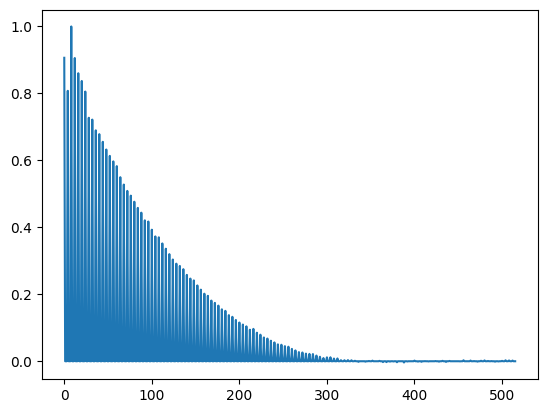

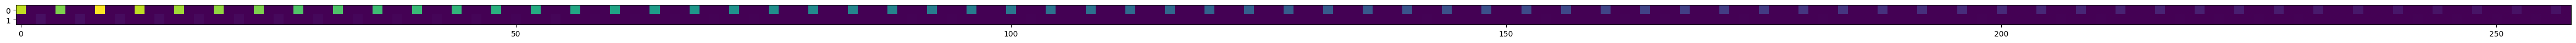

In [38]:
import numpy as np
x  = otf_flatten.shape[0]
print(x)
  # Example array of shape (128,)

# Create an array of zeros with the same shape[0] (128,)
bar = np.zeros(x)

# Stack them together along a new axis to create a shape of (128, 2)
new_Otf = np.column_stack((otf_flatten, bar))

print(f'new otf  : \nShape: {new_Otf.shape}\n Max: {new_Otf.max()}\n Min: {new_Otf.min()} \ntype: {new_Otf.dtype}')
plt.plot(new_Otf.flatten())
plt.show()

plt.figure(figsize=(30, 20))
plt.imshow(new_Otf.reshape(2,258))
plt.show()